In [1]:
%cd ..

/home/shpotes/Courses/EAFIT/experimental/course/metodos-no-parametricos/codigos


In [2]:
import sympy as sy

from src import ContinuousModel
from src.identification import transient
from src.identification.utils import compare_models

In [3]:
def punto_uno(model, **kwargs):
    graphic = transient.identify_first_order(
        model,
        method='graphic',
        **kwargs
    )
    linear = transient.identify_first_order(
        model,
        method='linear',
        **kwargs
    )
    
    print(f'grafico: {graphic["equation"]}')
    print(f'lineal: {linear["equation"]}')
    
    compare_models({
        'real': model,
        'linear': linear['model'],
        'graphic': graphic['model']
    })

grafico: 0.499999999999998/(0.25025025025025*s + 1)
lineal: 0.499999999999998*exp(-0.0165007648073607*s)/(0.248480393928288*s + 1)
Error linear =  1.8218343140979387e-05
Error graphic =  1.5632813736273205e-09


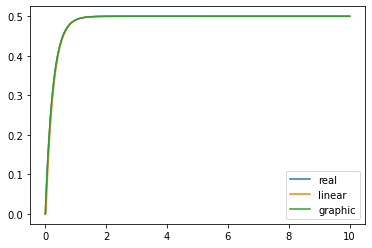

In [4]:
# 1.a
model = ContinuousModel([2], [1, 4])
punto_uno(model)

grafico: 7.83788630310258*exp(-2.2022022022022*s)/(1.93193193193193*s + 1)
lineal: 7.83788630310258*exp(-2.78579958845254*s)/(1.41583545665801*s + 1)


/home/shpotes/Courses/EAFIT/experimental/course/metodos-no-parametricos/codigos/src/identification/transient/first_order.py:32: UserWarning: maybe you want to simulate for longer
  warnings.warn('maybe you want to simulate for longer')


Error linear =  0.24443154889859736
Error graphic =  0.005106481106770127


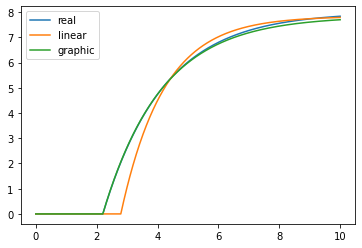

In [5]:
# 1. b
model = ContinuousModel([4], [1, 0.5], delay=2.2)
punto_uno(model)

grafico: 0.997519593115689*exp(-1.001001001001*s)/(1.49149149149149*s + 1)
lineal: 0.997519593115689*exp(-1.43260657403515*s)/(1.24497669462035*s + 1)
Error linear =  0.0035235772609558754
Error graphic =  2.277943515154495e-06


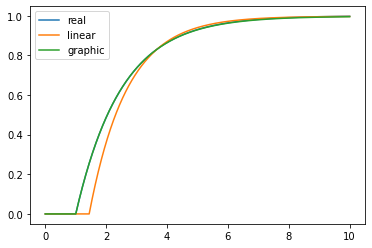

In [6]:
# 1. c
model = ContinuousModel([2], [3, 2], delay=1)
punto_uno(model)

In [7]:
# 1. d
s = sy.symbols('s')
sy.expand((s + 0.5) * (s + 5), s)

s**2 + 5.5*s + 2.5

grafico: 0.794010713778581/(2.18218218218218*s + 1)
lineal: 0.794010713778581*exp(-0.745216170391341*s)/(1.56785595529057*s + 1)
Error linear =  0.0023384360791608282
Error graphic =  0.000281363001105442


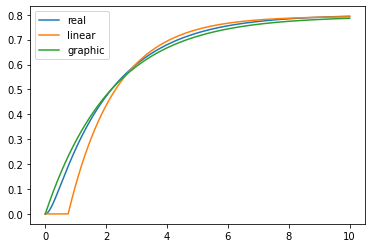

In [8]:
model = ContinuousModel([2], [1, 5.5, 2.5])
punto_uno(model)

In [9]:
# 1. e
s = sy.symbols('s')
sy.expand((s + 0.1) * (s + 1) * (s + 3), s)

s**3 + 4.1*s**2 + 3.4*s + 0.3

grafico: 1.74437900724419*exp(-3.1031031031031*s)/(4.01401401401401*s + 1)
lineal: 1.74437900724419*exp(-4.25711138425856*s)/(2.08722920302866*s + 1)
Error linear =  0.013553404735028704
Error graphic =  0.014762245094834951


/home/shpotes/Courses/EAFIT/experimental/course/metodos-no-parametricos/codigos/src/identification/transient/first_order.py:32: UserWarning: maybe you want to simulate for longer
  warnings.warn('maybe you want to simulate for longer')


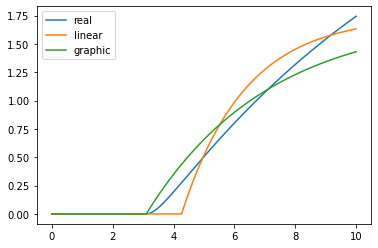

In [10]:
model = ContinuousModel([1, 1.1], [1, 4.1, 3.4, 0.3], delay=3.1)
punto_uno(model)

In [11]:
s = sy.symbols('s')
sy.expand((s + 1) * (s + 2), s)

s**2 + 3*s + 2

grafico: 0.999909202201596/(1.58158158158158*s + 1)
lineal: 0.999909202201596*exp(-0.706642314706713*s)/(0.948568151847521*s + 1)
Error linear =  0.002685274117945137
Error graphic =  0.0016698493701581443


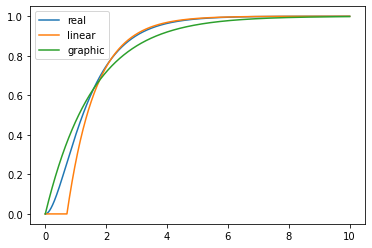

In [12]:
model = ContinuousModel([2], [1, 3, 2])
punto_uno(model)